<a href="https://colab.research.google.com/github/haziranz/classification-DM-/blob/main/Bayesian_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workspace preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
plt.style.use('ggplot')

**Loading data file**

In [2]:
dataset = pd.read_csv('/content/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
dataset.shape

(891, 12)

**Missing value identification/ handling**

In [5]:
dataset.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


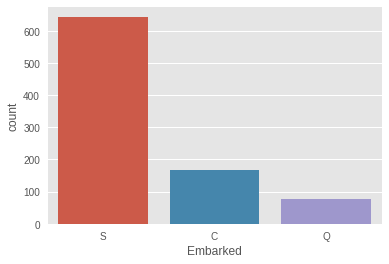

In [6]:
sns.countplot(dataset['Embarked'])

In [7]:
# File missing values in embarked with S which is the most frequent item.
dataset = dataset.fillna({"Embarked": "S"})

**Handling categorical variables**

In [8]:
# Sex feature
le_sex = preprocessing.LabelEncoder()
le_sex.fit(["male", "female"])
dataset['Sex'] = le_sex.transform(dataset['Sex'])

In [9]:
# Embark feature
le_embark = preprocessing.LabelEncoder()
le_embark.fit(["S", "C", "Q"])
dataset['Embarked'] = le_embark.transform(dataset['Embarked'])

**Applying model**

In [10]:
train_class = dataset[['Survived']]
train_feature = dataset[['Pclass', 'Sex', 'Embarked', 'Parch', 'SibSp', 'Fare']]
train_feature.head()

,Pclass,Sex,Embarked,Parch,SibSp,Fare
0,3,1,2,0,1,7.2500
1,1,0,0,0,1,71.2833
2,3,0,2,0,0,7.9250
3,1,0,2,0,1,53.1000
4,3,1,2,0,0,8.0500


In [11]:
clf = GaussianNB()

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf, train_feature, train_class.values.ravel(), cv=10, scoring=scoring)

print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_macro', 'test_f1_macro'])
Accuracy score : 0.785
Precisoin score : 0.774
Recall score : 0.773
F1 score : 0.772


**Creating submission file**

In [13]:
# Loading test dataset
test = pd.read_csv('/content/test.csv')

# Fit the model
clf.fit(train_feature, train_class.values.ravel())

# Replace missing Fare values with mean
meanFare = dataset['Fare'].mean()
test = test.fillna({"Fare": meanFare})

# Categorical -> numerical conversion
test['Sex'] = le_sex.transform(test['Sex'])
test['Embarked'] = le_embark.transform(test['Embarked'])

#set ids as PassengerId and predict survival
ids = test['PassengerId']
test_feature = test[['Pclass', 'Sex', 'Embarked', 'Parch', 'SibSp', 'Fare']]
predictions = clf.predict(test_feature)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
output.to_csv('submission.csv', index=False)